<h1>Autoregressive Models</h1>

In this lesson we will introduce autoregressive models and apply them to time series data.

<h2>From Regression to AutoRegression</h2>

Up until now we have been ignoring an important aspect of all of the data we have explored -- that they are sampled at a specific point in time! Nearly all of the data you will work with in your career is just a snapshot of a process at a specific instance in time. However, it is often a decent assumption that the data is stationary -- or that the statistical properties of the data do not change in time. This means that if I measure the mean of the distribution today or I measure the mean of the distribution in 24 days from now, I should expect to get the same results. 

But what happens when this assumption is violated, or when we expect that the time the data is sampled is important to the outcome we are measuring?

Let's imagine trying to predict the number of new subscribers to a service. Up until now we would treat this as a stationary problem. We might assume that each month the number of subscribers is just given by a dataset for that month that contains information about the customers, the advertising spend, and maybe the marketing spend.

But what happens if the number of new subscribers changes depending on the point in the year? Say for example that the service you offer is an education product and every year when a new college semester starts you see a lot of additional sign ups? How should we model the dependence on time?

In regression we might introduce time to be one of our predictors $X_i$ and extend our model
$$y_i = \beta_0 +\beta_1 X_1 + ... + \beta_i X_i$$

so that we explicitly force the dependent variable to depend on time in our model.

Do you think this works? Can you see any challenges with this approach?

<h2>Autoregression</h2>

We have identified a major issue with using regression. All of the independent variables also depend on the time! Regression will fail to capture this correlation. We can get around this in three different ways:
- Use a different algorithm that handles these correlations better (i.e., a tree-based method)
- Re-train your model on only the most recent data
- Use an autoregressive model

We'll focus on autoregressive models. The basic formulation of an autoregressive model is one where the next observation depends solely on the previous observations:
$$y_{t+1} = \beta_1 y_{t} + \epsilon$$

In our example above, this just means we assume that the previous observation contains all the information we require in order to make a good prediction about the future. Autoregressive models use the series of ordered observations 
$$y_0, y_1, ..., y_i, ..., y_{t}$$
to make new predictions $y_{t+1}$.

Let's see this in practice:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("sp500_stocks.csv")

In [27]:
df_amzn = df[df['Symbol']=='AMZN']
df_amzn.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
83694,2010-01-04 00:00:00-05:00,AMZN,6.6950,6.6950,6.8305,6.6570,6.8125,151998000.0
83695,2010-01-05 00:00:00-05:00,AMZN,6.7345,6.7345,6.7740,6.5905,6.6715,177038000.0
83696,2010-01-06 00:00:00-05:00,AMZN,6.6125,6.6125,6.7365,6.5825,6.7300,143576000.0
83697,2010-01-07 00:00:00-05:00,AMZN,6.5000,6.5000,6.6160,6.4400,6.6005,220604000.0
83698,2010-01-08 00:00:00-05:00,AMZN,6.6760,6.6760,6.6840,6.4515,6.5280,196610000.0


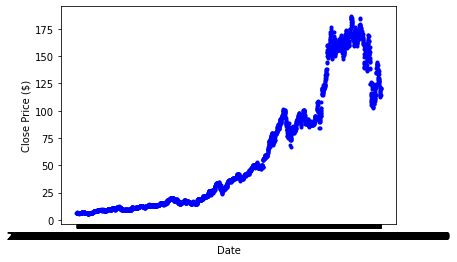

In [4]:
plt.plot(df_amzn['Date'], df_amzn['Close'], 'b.')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

Autoregressive models give us a new framework to make predictions. We just want to use the past information to predict the future. Let's take the most naive approach first where we just say that tomorrow will look like today.

In [5]:
df_amzn['LagClose'] = df_amzn['Close'].shift(1)
df_amzn['Residual'] = df_amzn['LagClose'] - df_amzn['Close']
df_amzn.head()

/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/1652638578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['LagClose'] = df_amzn['Close'].shift(1)
/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/1652638578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['Residual'] = df_amzn['LagClose'] - df_amzn['Close']


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,LagClose,Residual
83694,2010-01-04 00:00:00-05:00,AMZN,6.6950,6.6950,6.8305,6.6570,6.8125,151998000.0,NaN,NaN
83695,2010-01-05 00:00:00-05:00,AMZN,6.7345,6.7345,6.7740,6.5905,6.6715,177038000.0,6.6950,-0.0395
83696,2010-01-06 00:00:00-05:00,AMZN,6.6125,6.6125,6.7365,6.5825,6.7300,143576000.0,6.7345,0.1220
83697,2010-01-07 00:00:00-05:00,AMZN,6.5000,6.5000,6.6160,6.4400,6.6005,220604000.0,6.6125,0.1125
83698,2010-01-08 00:00:00-05:00,AMZN,6.6760,6.6760,6.6840,6.4515,6.5280,196610000.0,6.5000,-0.1760


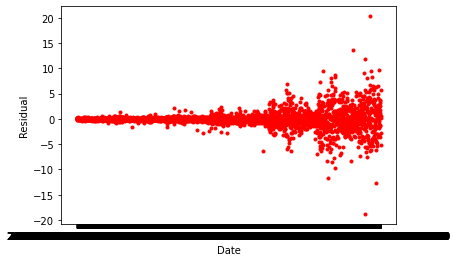

In [6]:
plt.plot(df_amzn['Date'], df_amzn['Residual'], 'r.')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

Based on the residuals it looks like yesterday is a pretty good approximation of today. Can you see a problem with this approach though?

What if we need to forecast an entire month into the future?

When our observations run out, we will predict based on the previous prediction. In this case, we will continue to say yesterday's value should be the prediction. We'll just predict a single value!

What ideas do you have to fix this issue?

<h2>Moving Average</h2>

One way to encode more information into the signal is to look further back in time:
$$y_{t+1} = \beta_0+\beta_1 y_t + \beta_2 y_{t-1}$$

In this way we are saying that the signal tomorrow depends on the signal today AND the signal from yesterday.

In fact, a common approach is to take an average of the previous two observations and use that as the prediction. Let's see this in action:

In [28]:
df_amzn['RollingAverage'] = df_amzn['Close'].rolling(2).mean()
df_amzn['ResidualRA'] = df_amzn['RollingAverage'] - df_amzn['Close']
df_amzn.head()

/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/1489210664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['RollingAverage'] = df_amzn['Close'].rolling(2).mean()
/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/1489210664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['ResidualRA'] = df_amzn['RollingAverage'] - df_amzn['Close']


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,RollingAverage,ResidualRA
83694,2010-01-04 00:00:00-05:00,AMZN,6.6950,6.6950,6.8305,6.6570,6.8125,151998000.0,NaN,NaN
83695,2010-01-05 00:00:00-05:00,AMZN,6.7345,6.7345,6.7740,6.5905,6.6715,177038000.0,6.71475,-0.01975
83696,2010-01-06 00:00:00-05:00,AMZN,6.6125,6.6125,6.7365,6.5825,6.7300,143576000.0,6.67350,0.06100
83697,2010-01-07 00:00:00-05:00,AMZN,6.5000,6.5000,6.6160,6.4400,6.6005,220604000.0,6.55625,0.05625
83698,2010-01-08 00:00:00-05:00,AMZN,6.6760,6.6760,6.6840,6.4515,6.5280,196610000.0,6.58800,-0.08800


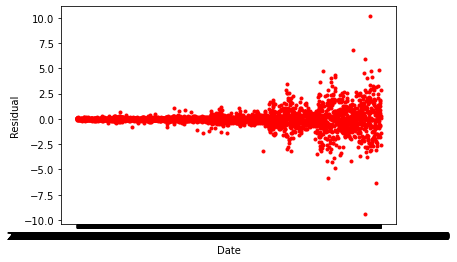

In [8]:
plt.plot(df_amzn['Date'], df_amzn['ResidualRA'], 'r.')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

In this example I used a window size of 2 which means I just used the average of the previous two observations. But we might be able to do better if we chose a larger window size.

In [29]:
df_amzn['RollingAverage_3'] = df_amzn['Close'].rolling(3).mean()
df_amzn['RollingAverage_5'] = df_amzn['Close'].rolling(5).mean()
df_amzn['RollingAverage_7'] = df_amzn['Close'].rolling(7).mean()
df_amzn['RollingAverage_9'] = df_amzn['Close'].rolling(9).mean()
df_amzn['RollingAverage_21'] = df_amzn['Close'].rolling(21).mean()

/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/4225179133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['RollingAverage_3'] = df_amzn['Close'].rolling(3).mean()
/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/4225179133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['RollingAverage_5'] = df_amzn['Close'].rolling(5).mean()
/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/4225179133.py:3: SettingWithCopyWarning: 
A value is trying t

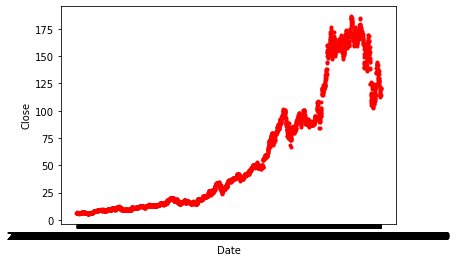

In [10]:
plt.plot(df_amzn['Date'], df_amzn['Close'], 'r.')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

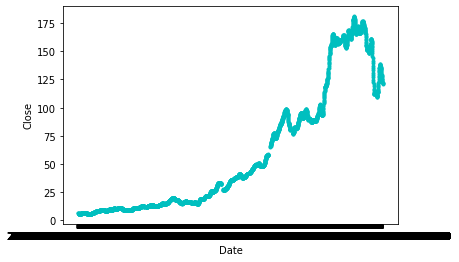

In [11]:
plt.plot(df_amzn['Date'], df_amzn['RollingAverage_21'], 'c.')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

/var/folders/6p/vpcv2sx57sg04vs430_8y4ch0000gp/T/ipykernel_64140/1618016001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['Residual21'] = df_amzn['RollingAverage_21'] - df_amzn['Close']


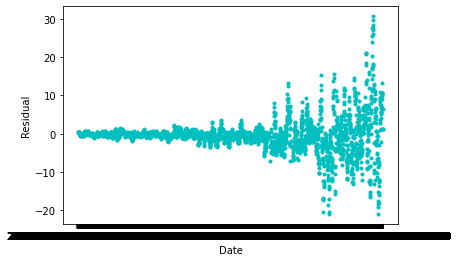

In [30]:
df_amzn['Residual21'] = df_amzn['RollingAverage_21'] - df_amzn['Close']
plt.plot(df_amzn['Date'], df_amzn['Residual21'], 'c.')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

The moving average acts as a kind of "smoothing" for the signal. Another way to think of it is estimating the "Trend" in the data. In fact, in time series decomposition a moving average is the starting point to estimate the trend, or how much the signal is changing in a linear way. Hopefully, this is suggested by the formula above.

<h2>Time Series Decomposition</h2>

What does it mean to have a "Trend" in our data?

We are basically imagining that we could express the function decribing our observations as a sum (or product) of components that vary differently in time. "Trend" would be slowly varying (like slope) -- does our data increase or decrease over time. We could also have different components to our data that come from the signal changing at different rates. Let's look at an example:

In [31]:
import numpy as np
df = pd.DataFrame({
    'x': np.arange(0,10,0.1),
    'y1': np.arange(0,10,0.1)*0.5+3+np.random.random(len(np.arange(0,10,0.1))),
    'y2': np.sin(np.arange(0,10,0.1)*0.2)+np.random.random(len(np.arange(0,10,0.1))),
    'y3': np.sin(np.arange(0,10,0.1)*1)+np.random.random(len(np.arange(0,10,0.1))),
    'y4': np.sin(np.arange(0,10,0.1)*5)+np.random.random(len(np.arange(0,10,0.1)))
})
df['y'] = df['y1']+df['y2']+df['y3']+df['y4']
df.head()

,x,y1,y2,y3,y4,y
0,0.0,3.392379,0.411139,0.414707,0.552241,4.770465
1,0.1,3.336121,0.394125,0.679319,1.081820,5.491385
2,0.2,4.040703,0.491445,0.483209,1.601855,6.617213
3,0.3,3.676802,0.430770,0.352223,1.215794,5.675589
4,0.4,3.943072,0.226704,0.749977,1.024238,5.943991


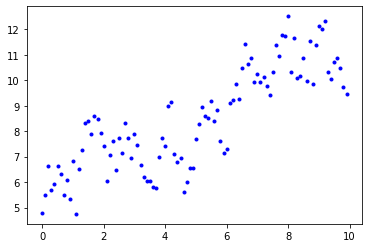

In [32]:
plt.plot(df['x'], df['y'], 'b.')
plt.show()

What periods exist in this data?

There is a linear trend and a number of different frequency components. The idea here is to express the remainder as a sum of the components:
$$R = y - T - S_1 - S_2 - S_3 - ...$$

where each of the $S_i$ is a component at a different period.

Figuring out what each of the terms in this sum is pretty complicated but there has been a lot of progress made in estimating the periods such that you can now just import a package to do it for you.

Because I constructed the signal I can deconstruct it as well to get $R$.

In [33]:
df['R'] = df['y'] - np.arange(0,10,0.1)*0.5+3 - np.sin(np.arange(0,10,0.1)*0.2) - np.sin(np.arange(0,10,0.1)*1) - np.sin(np.arange(0,10,0.1)*5)
df.head()

,x,y1,y2,y3,y4,y,R
0,0.0,3.392379,0.411139,0.414707,0.552241,4.770465,7.770465
1,0.1,3.336121,0.394125,0.679319,1.081820,5.491385,7.842127
2,0.2,4.040703,0.491445,0.483209,1.601855,6.617213,8.437084
3,0.3,3.676802,0.430770,0.352223,1.215794,5.675589,7.172610
4,0.4,3.943072,0.226704,0.749977,1.024238,5.943991,7.365360


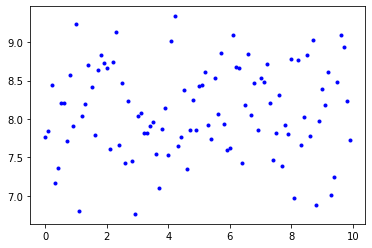

In [34]:
plt.plot(df['x'], df['R'], 'b.')
plt.show()

This remainder is the signal that we might not be able to predict very reliably. But the components are signals that we might know (or can estimate) well and so we can produce an accurate forecast and then just add up the individual components.

<h2>Advanced Smoothing Techniques</h2>

We saw that if we can smooth the signal it can help us to understand what is happening. But there was a big issue with our two approaches. Our first approach just used the most recent observation to predict the next. In averaging we treated every observation in the past the same.

What if we want to put more focus on recent data?

One way to focus more on a subset of data is to introduce weights where the weight decreases as we go further back in time.

We can express this mathematically via exponential smoothing:
$$y_{t+1} = \alpha y_t + \alpha(1-\alpha)y_{t-1} + \alpha(1-\alpha)^2y_{t-2}+...$$

where $\alpha$ is the smoothing parameter that controls how fast the weights should decay -- or how much attention to pay to things in the past. A value of $\alpha$ close to one means you pay the most attention to recent data. As $\alpha$ gets smaller you start paying more attention to data in the past.

In [41]:
df_amzn['OUT'] = df_amzn['Close'].ewm(alpha=0.005).mean()

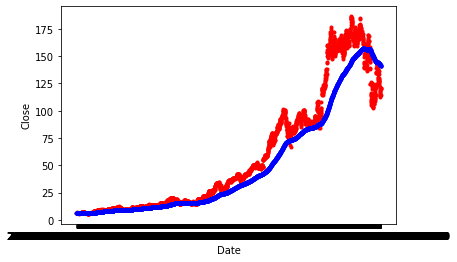

In [42]:
plt.plot(df_amzn['Date'], df_amzn['Close'], 'r.')
plt.plot(df_amzn['Date'], df_amzn['OUT'], 'b.')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

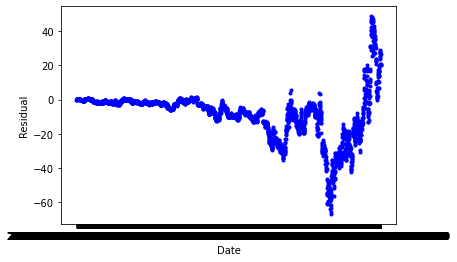

In [43]:
df_amzn['RES'] = df_amzn['OUT'] - df_amzn['Close']
plt.plot(df_amzn['Date'], df_amzn['RES'], 'b.')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

<h2>ARIMA</h2>

While we have focused on explaining trends and seasonal components in the data, an ARIMA model instead focuses on autocorrelations.

We first need to introduce the idea of "stationarity". This is the opposite of everything we have talked about so far! 

A stationary time series is one whose observation at any given point in time does not change depending on when you observe it. There is no trend or seasonality. This would be $R$ in the decomposition we introduced before.

The time series for Amazon stock price is non-stationary. There is a clear trend. However, we might be able to transform the time series to make it stationary. In fact, the residual we computed at the beginning of lecture should be stationary.

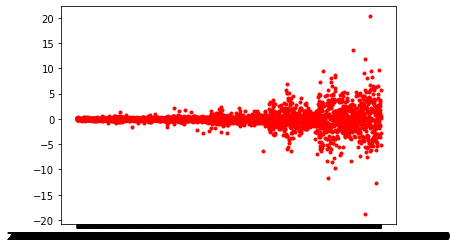

In [18]:
plt.plot(df_amzn['Date'], df_amzn['Residual'], 'r.')
plt.show()

The idea here is called differencing. By taking the difference of adjacent points we are effectively subtracting out the common parts (the trend because it contributes to each point the same amount).

We can further extend the idea of differencing to the seasonal components. If we take points separated by one period and subtract them we can remove the component.

How do we know if a signal is stationary?

We want to test the hypothesis that the signal is stationary. There is a set of hypothesis tests called unit root tests that we can use.

One such test is the KPSS test which we can apply to our data.

In [19]:
import statsmodels.api as sm

#perform KPSS test
sm.tsa.stattools.kpss(df_amzn['Close'].dropna(), regression='ct')

/Users/chris/opt/miniconda3/envs/teaching/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.5079876211233367,
 0.01,
 36,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [20]:
sm.tsa.stattools.kpss(df_amzn['Residual'].dropna(), regression='ct')

/Users/chris/opt/miniconda3/envs/teaching/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0890868316637839,
 0.1,
 3,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Surprisingly this test suggests that the original signal was more stationary than the differenced one! What do you think that means?

Once we have a stationary signal we can apply an autoregressive model. Autoregressive just means that the inputs to the model linear combinations of past values of the observation. As we've written before we express this as 
$$y_t = c + \phi_1 y_{t-1} + \phi y_{t-2} + ...$$

we call this an $AR(p)$ model (autoregressive model of order $p$) where $p$ is how far back in time we go.

In [23]:
from sktime.forecasting.arima import ARIMA
forecaster = ARIMA(  
    order=(1, 0, 0),
    suppress_warnings=True)
forecaster.fit(df_amzn['Close'])
y_pred = forecaster.predict(fh=[1,2,3]) 
print(y_pred)

86913    114.534820
86914    114.509653
86915    114.484498
dtype: float64


/Users/chris/opt/miniconda3/envs/teaching/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


We can also discuss moving average models (different from smoothing). Here we use the linear combination of the errors to make our predictions.
$$y_t = c + \psi_1 \epsilon_{t-1} + ...$$

In [24]:
forecaster = ARIMA(  
    order=(0, 0, 1),
    suppress_warnings=True)
forecaster.fit(df_amzn['Close'])
y_pred = forecaster.predict(fh=[1,2,3]) 
print(y_pred)

86913    71.459086
86914    58.201484
86915    58.201484
dtype: float64


/Users/chris/opt/miniconda3/envs/teaching/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


We note that there is a connection between the MA (moving average) and AR (autoregressive) parts. In fact, we can substitute values for one into the other.

When we combine both together we arrive at ARIMA models (Autoregressive integrated moving average) -- integration here refers to the amount of differencing we do. These models are specified by three parameters, $p$ the order of the AR part, $d$ the amount of differencing, and $q$ the order of the moving average part. Choosing the right parameters is incredibly important in order to get good forecasts.

<h2>Special Consideration For Training Time Series Models</h2>

We must pay special attention to target leakage when we are training and cross-validating our models for time series data. Normally, we can choose any selection of data to build a fold for cross-validation. In a time series problem we must instead enforce time ordering. We should not use future data to predict things that took place in the past. You can think of this like leave one out cross-validation -- often called walk forward validation -- we construct folds in a time ordered way.

We train on the past and predict on the future.